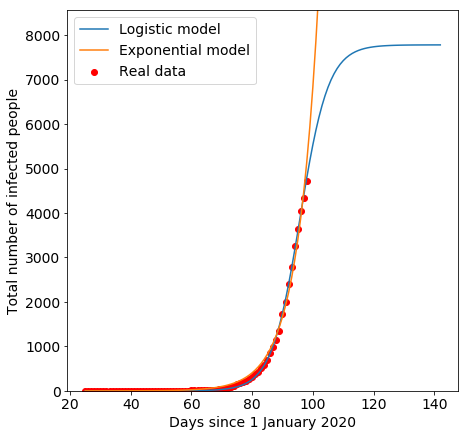

In [120]:
# Adapted from https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d
# by Gianluca Malato

import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Ontario.csv')
FMT = '%Y-%m-%d'
date = df['DATE']
# df['DATE'] = date.map(lambda x : (datetime.strptime(x,FMT)- datetime.strptime("2020-01-01 00:00:00" FMT)).days )


df['DATE'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2019-12-31", FMT)).days  )

# pd.to_numeric(df['DATE'])
# pd.to_numeric(df['NUMBER'])

def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

x = list(df.iloc[:,0])
y = list(df.iloc[:,1])



fit = curve_fit(logistic_model,x,y,p0=[2,100,6000])
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
# fit, errors

(a,b,c)=(fit[0][0],fit[0][1],fit[0][2])

sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))

def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

exp_fit = curve_fit(exponential_model,x,y,p0=[1,1,1], maxfev=5000)

pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Real data",color="red")
# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )
# Predicted exponential curve
plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
plt.legend()
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,c*1.1))
plt.show()